In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from forecasting_models.univariate_models.arima.model import ARIMAForecastModel
from forecasting_models.univariate_models.lstm.model import LSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

In [3]:
dataset = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min.csv")

dataset.shape

(4032, 1)

In [4]:
enable_plotting = True
n_splits = 3

In [5]:
lstm_model = LSTMForecastModel("./examples/configs/lstm/lstm_example_1_step.yaml")

** FOLD n.1 **
Training dataset plot:


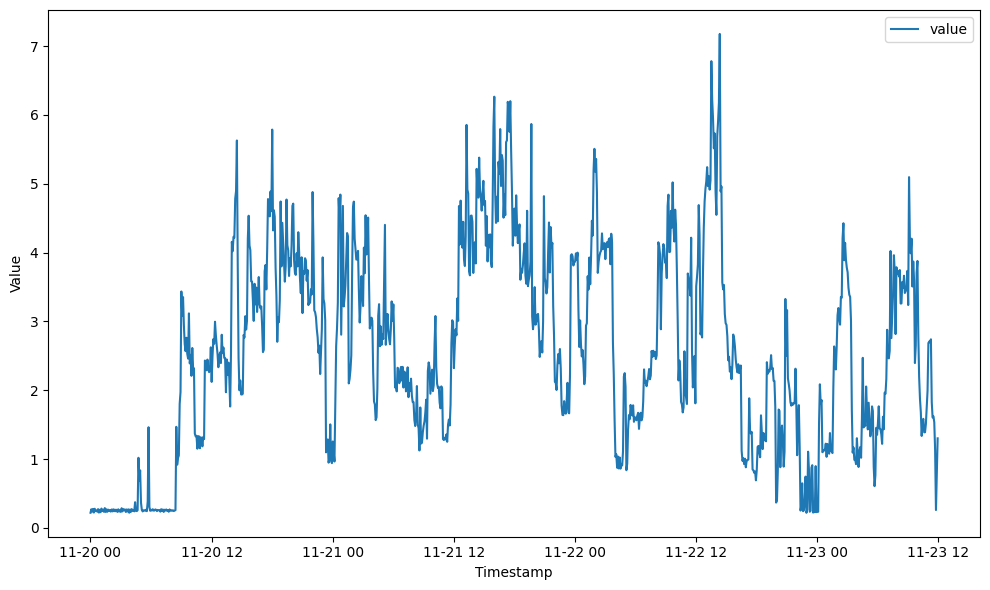

Fold n.1 evaluation result plot:


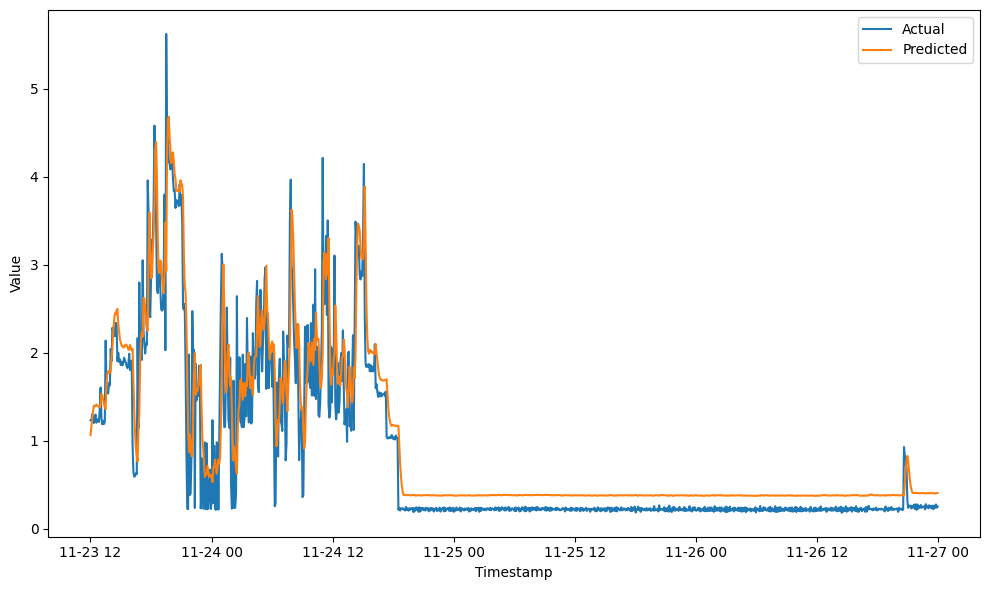

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


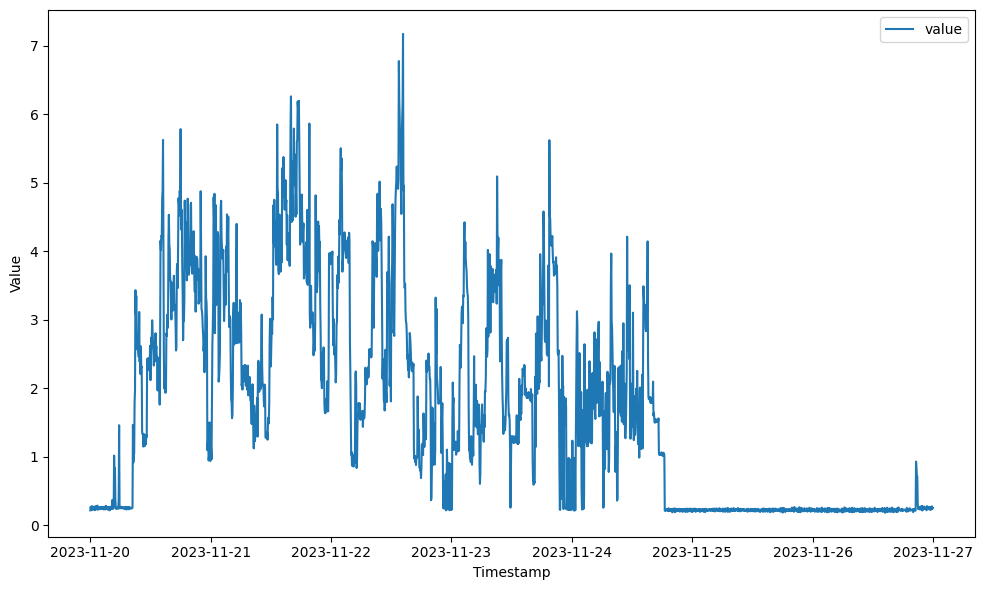

Fold n.2 evaluation result plot:


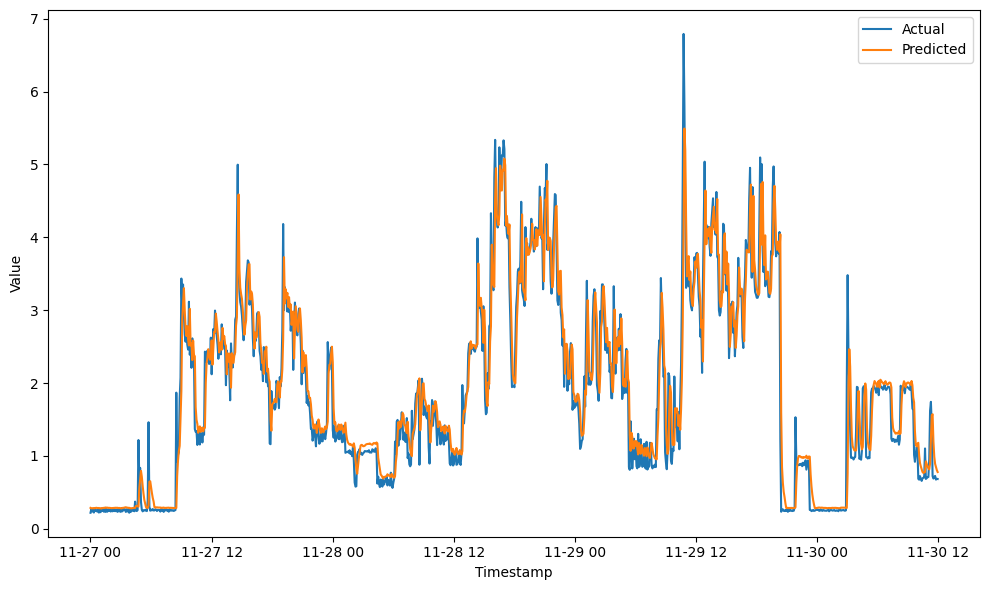

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


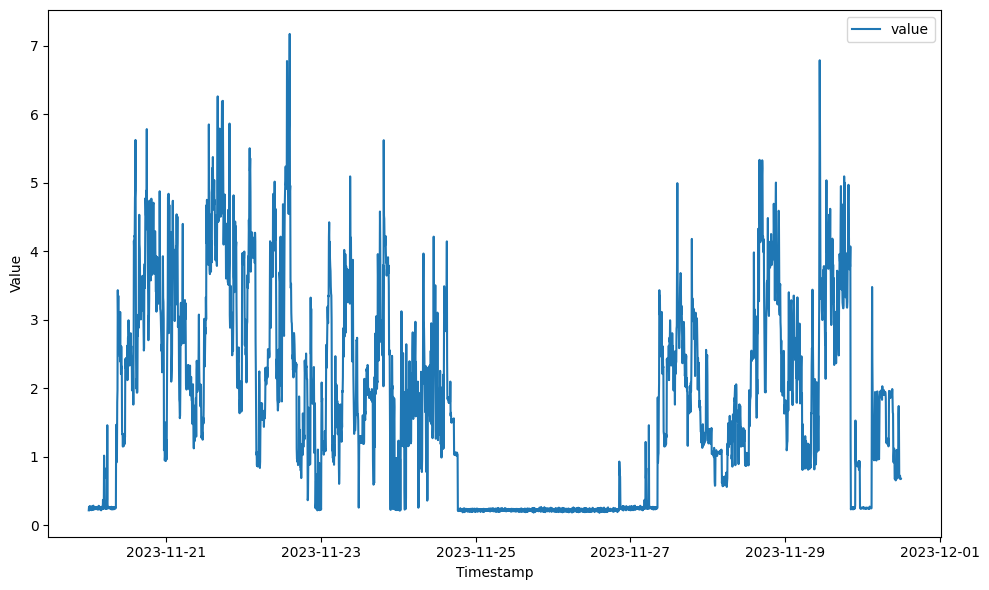

Fold n.3 evaluation result plot:


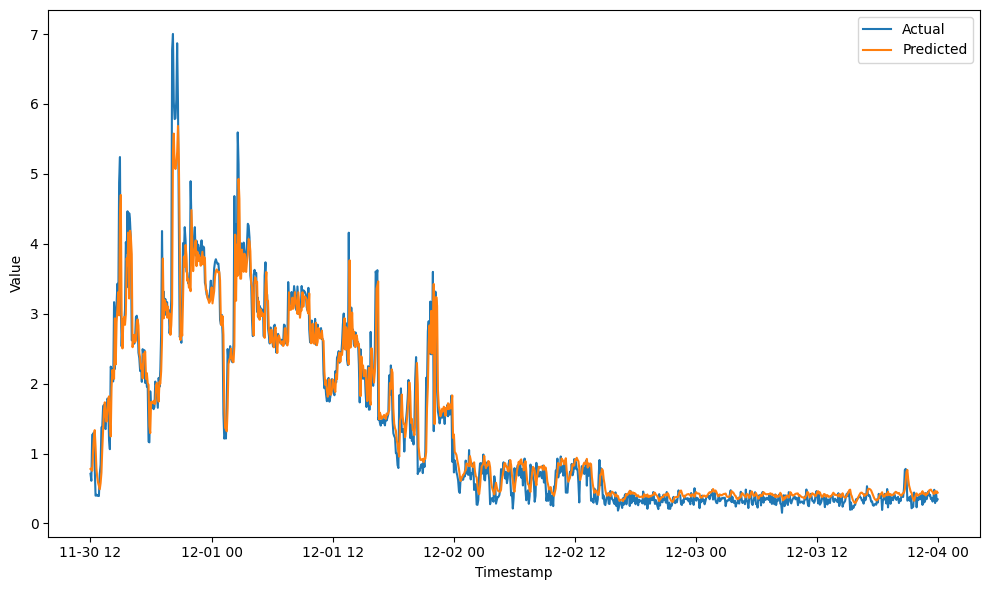

-----------------------------------------



In [6]:
from tensorflow.keras.layers import LSTM

from ts_cross_validation import lstm_eval_ts_cross_validation

lstm_evals_df = lstm_eval_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [7]:
lstm_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.409874,0.167997,64.200146,0.280627,0.824647
Fold 2,0.404096,0.163294,18.218358,0.258048,0.898101
Fold 3,0.349015,0.121811,23.065169,0.195633,0.927505


** FOLD n.1 **
Training dataset plot:


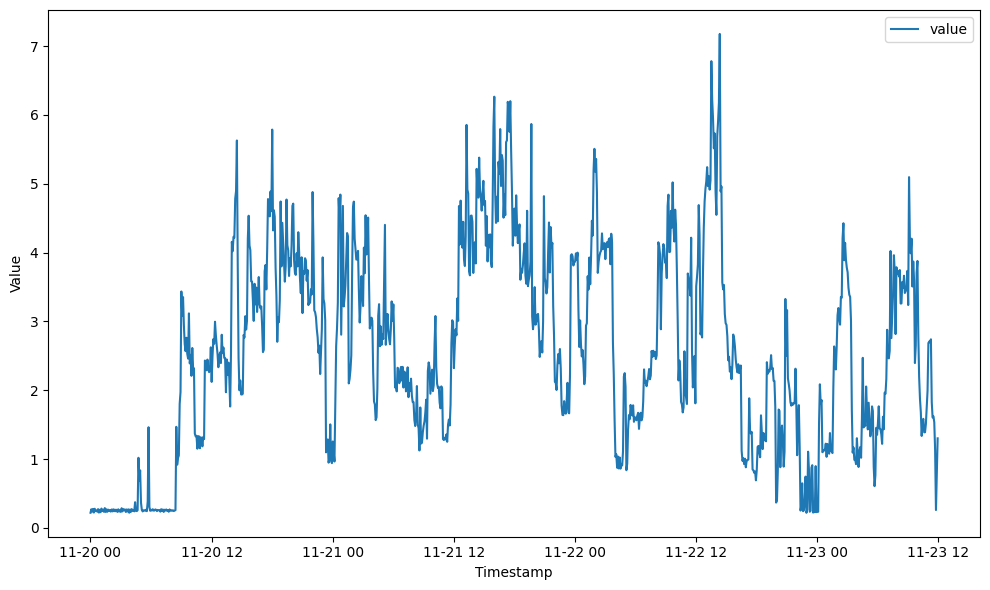

Fold n.1 evaluation result plot:


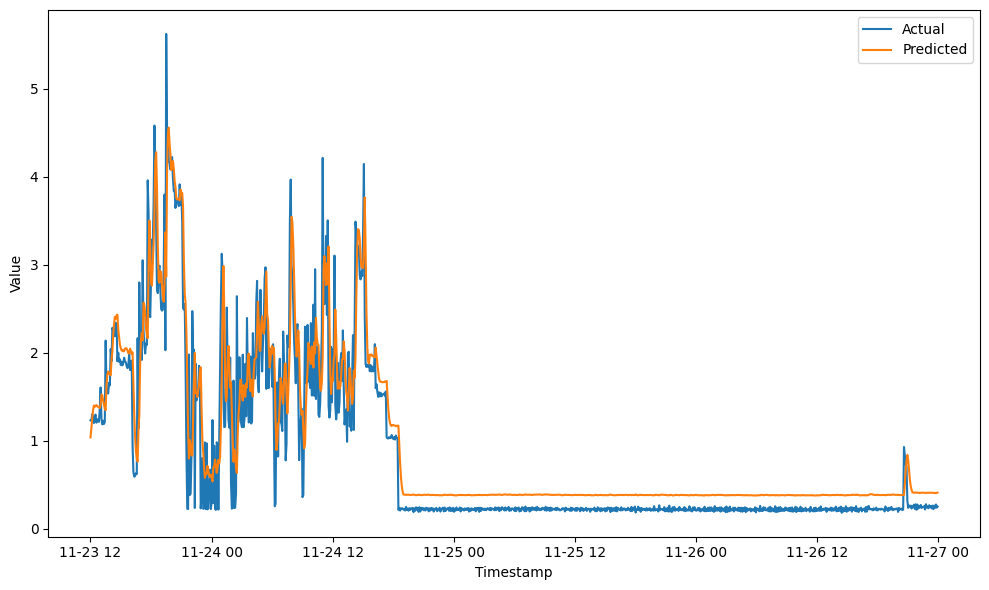

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


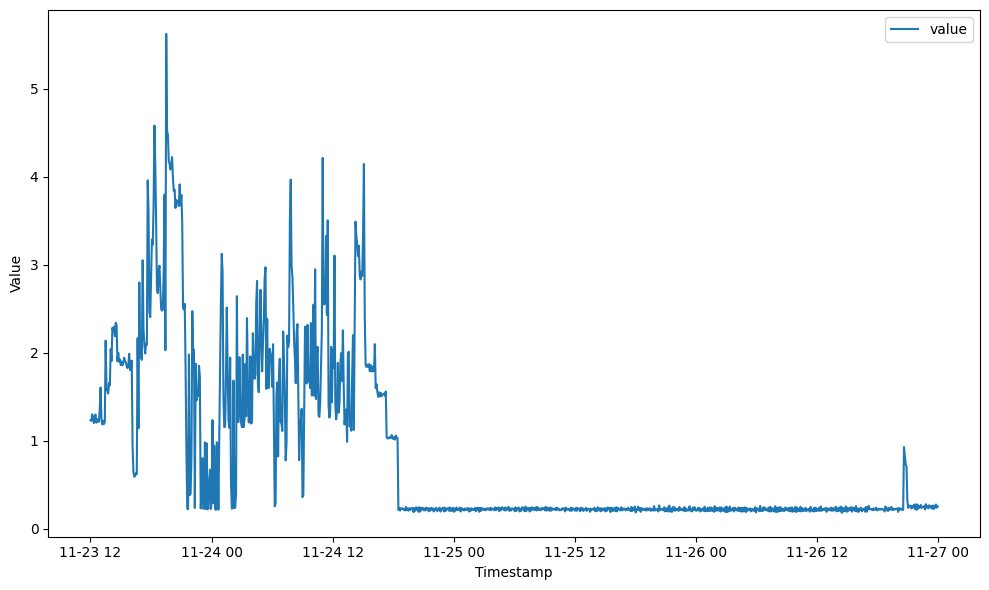

Fold n.2 evaluation result plot:


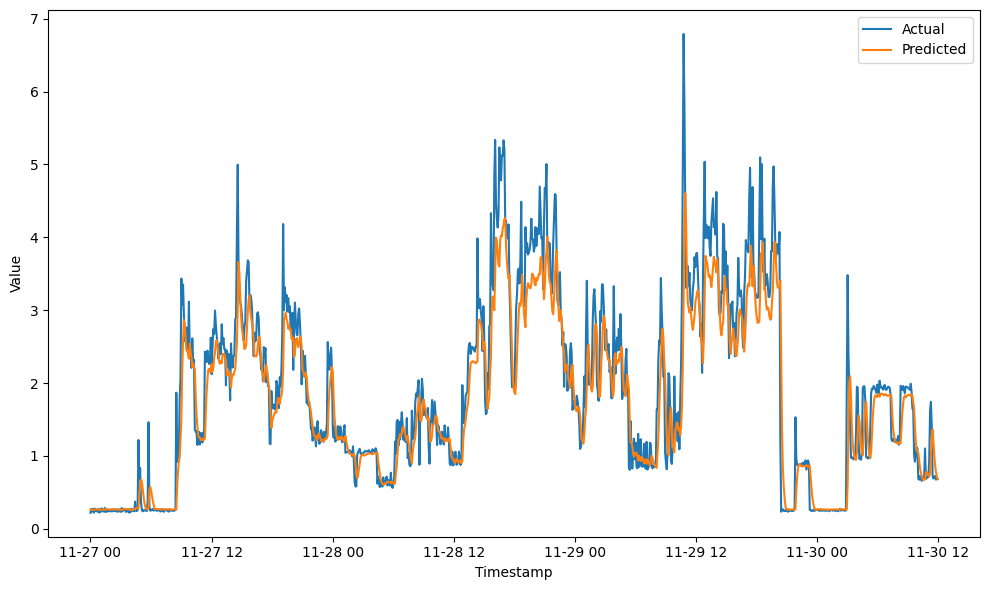

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


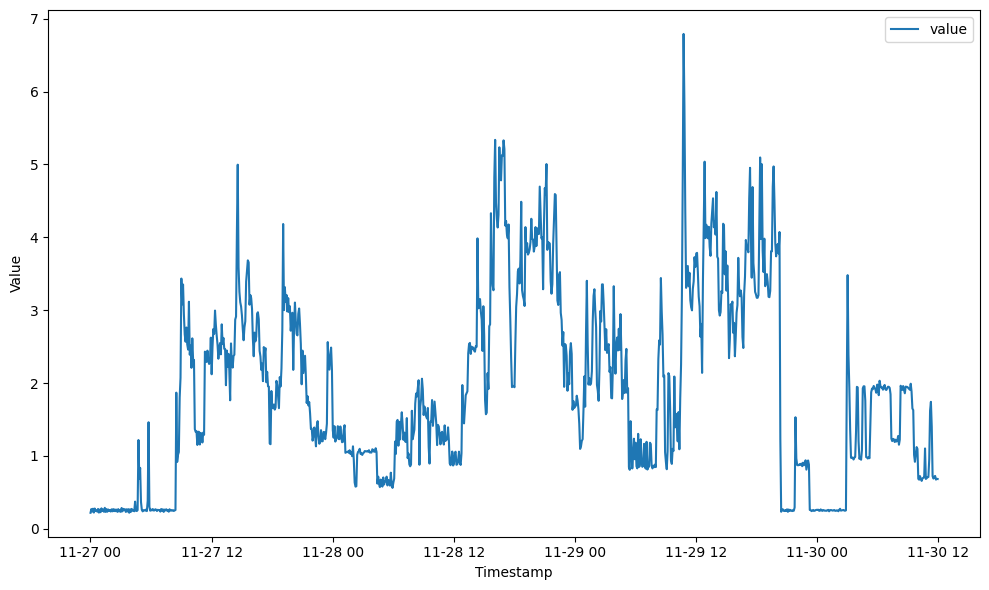

Fold n.3 evaluation result plot:


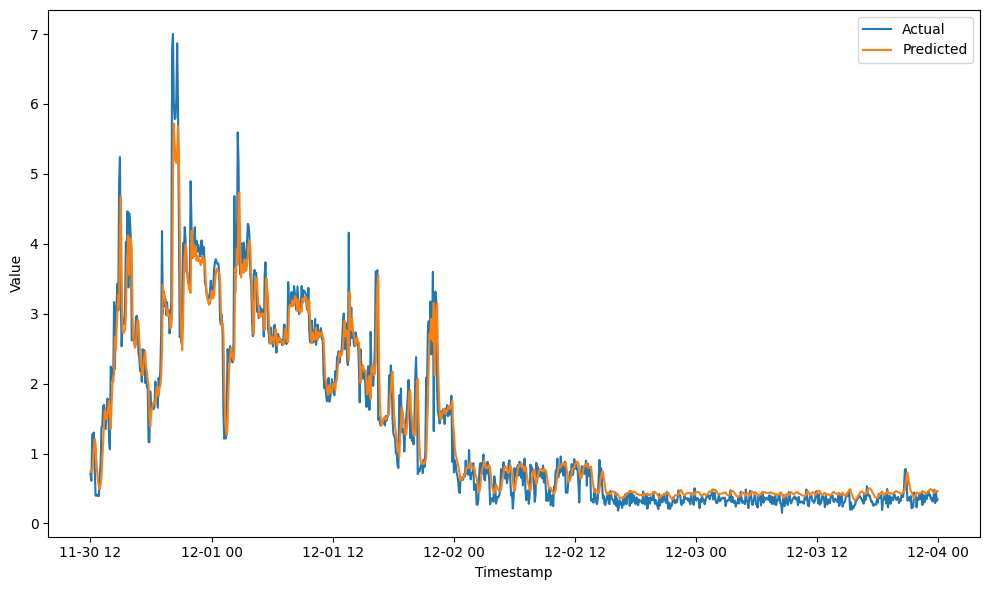

-----------------------------------------



In [8]:
from ts_cross_validation import lstm_eval_rolling_ts_cross_validation


lstm_rolling_evals_df = lstm_eval_rolling_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [9]:
lstm_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.403489,0.162803,64.724057,0.276887,0.830068
Fold 2,0.499844,0.249844,17.896802,0.308263,0.844092
Fold 3,0.357130,0.127541,25.088910,0.205459,0.924095


In [10]:
arima_model = ARIMAForecastModel("./examples/configs/arima/arima_example_1_step.yaml")

** FOLD n.1 **
Training dataset plot:


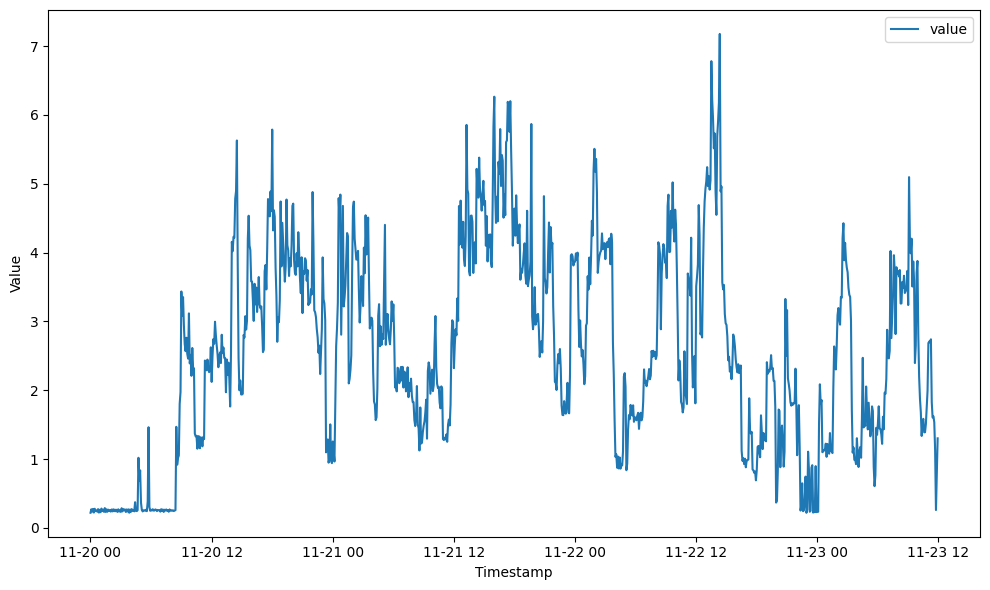

Fold n.1 evaluation result plot:


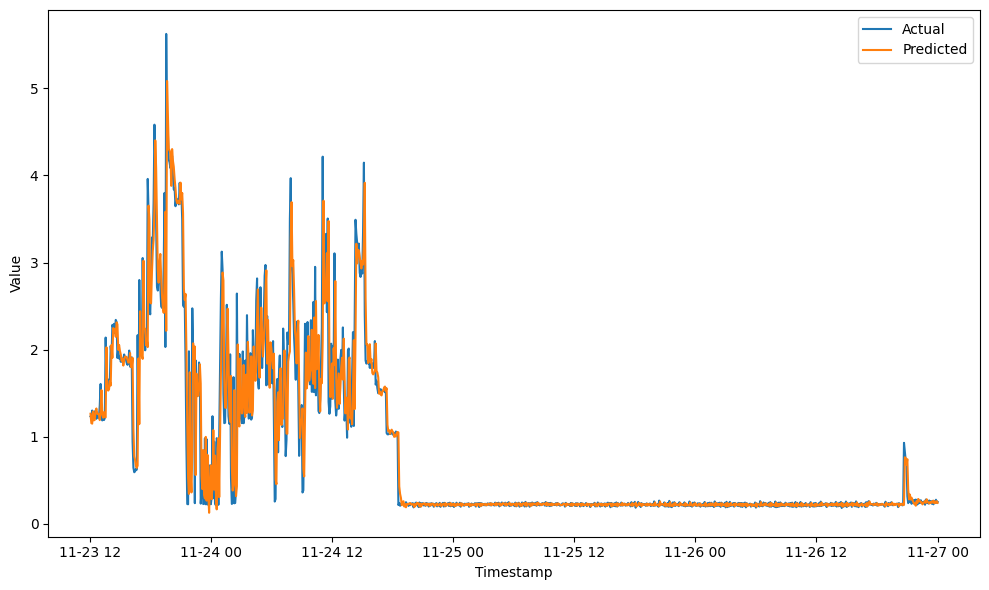

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


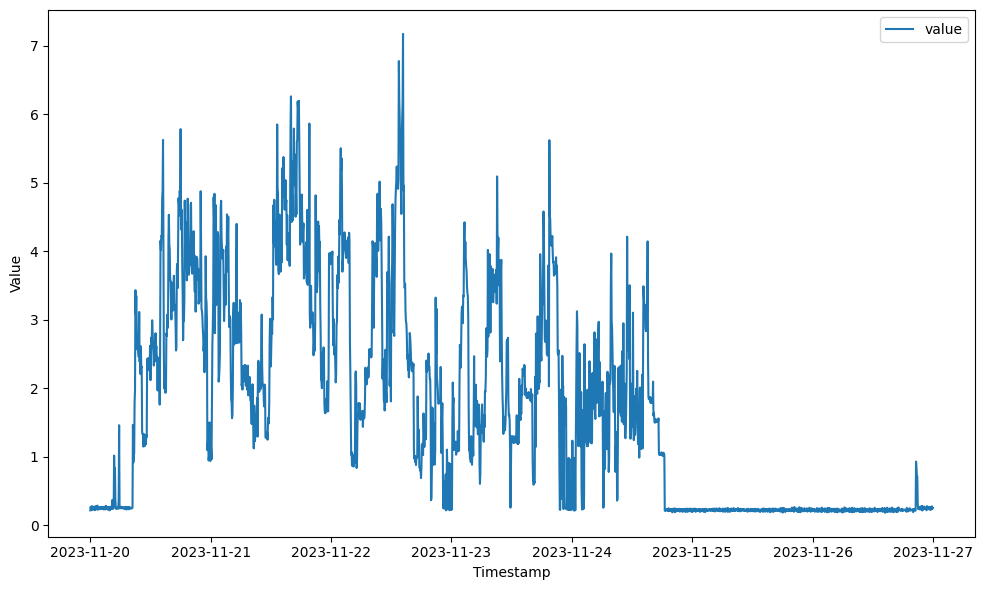

Fold n.2 evaluation result plot:


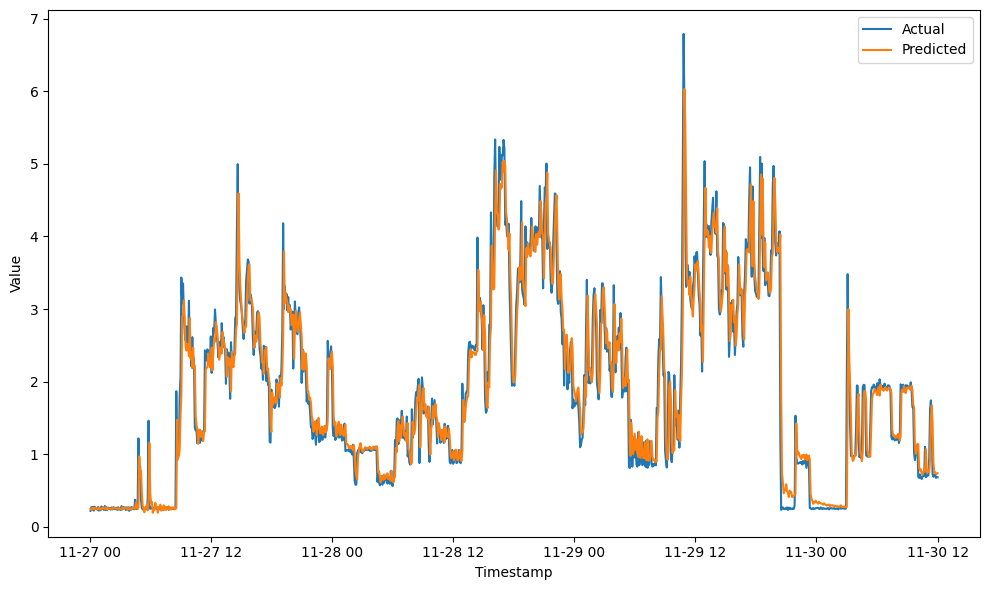

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


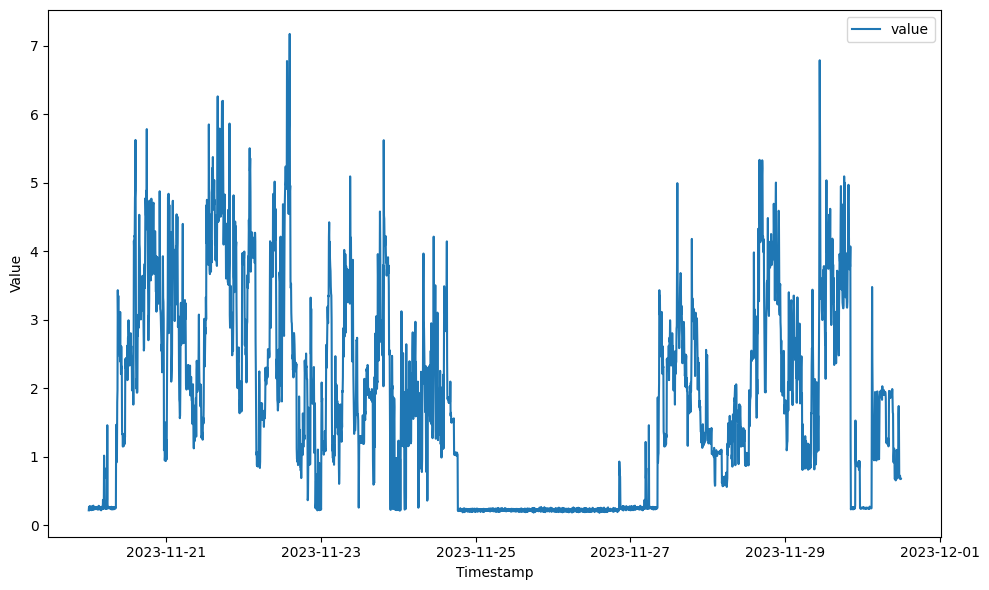

Fold n.3 evaluation result plot:


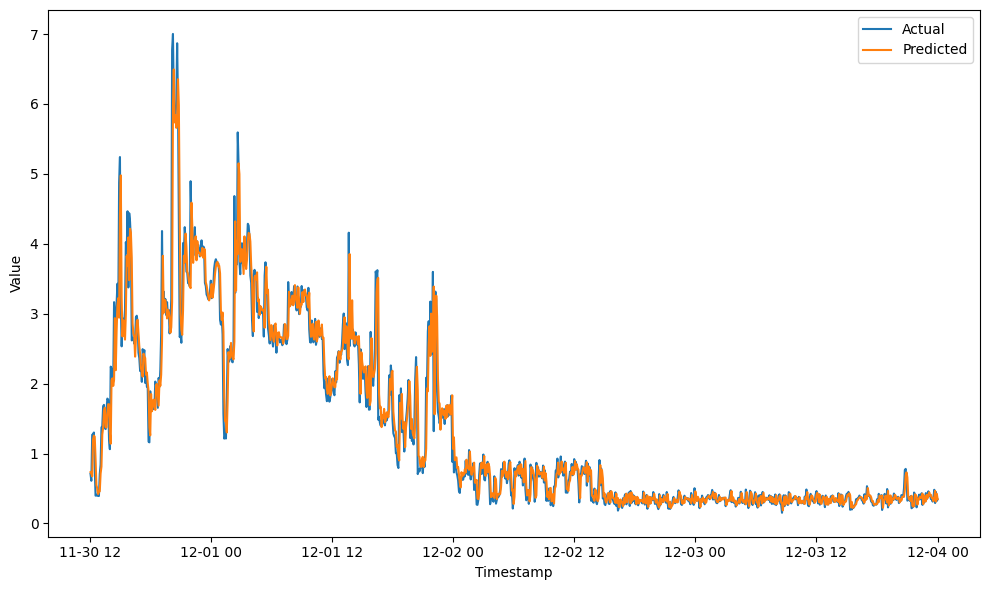

-----------------------------------------



In [11]:
from ts_cross_validation import arima_eval_ts_cross_validation


arima_evals_df = arima_eval_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [12]:
arima_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.378189,0.143027,21.152151,0.169883,0.850710
Fold 2,0.396767,0.157424,16.731993,0.246018,0.901764
Fold 3,0.340261,0.115777,18.260446,0.180046,0.931096


** FOLD n.1 **
Training dataset plot:


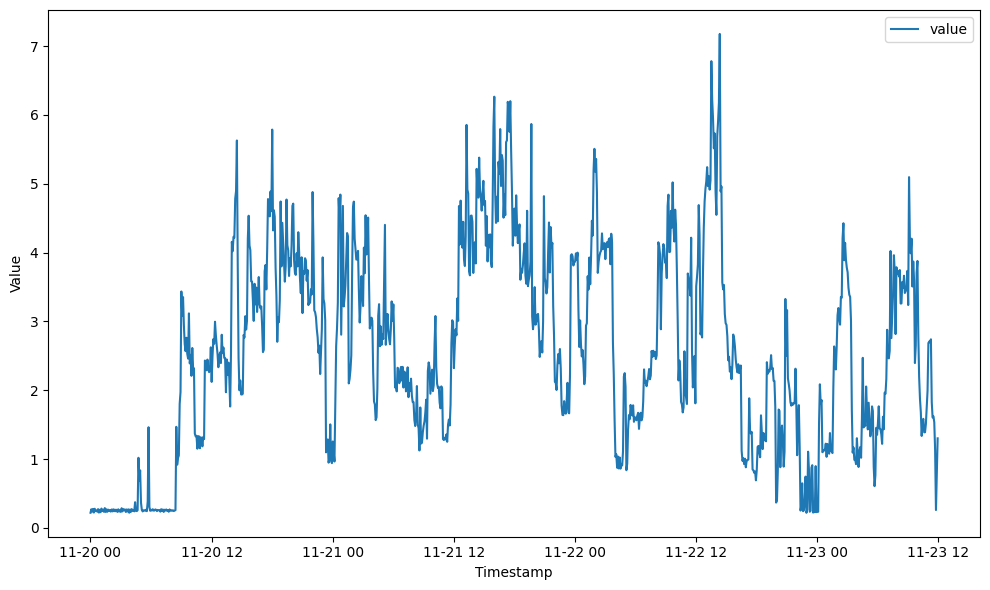

Fold n.1 evaluation result plot:


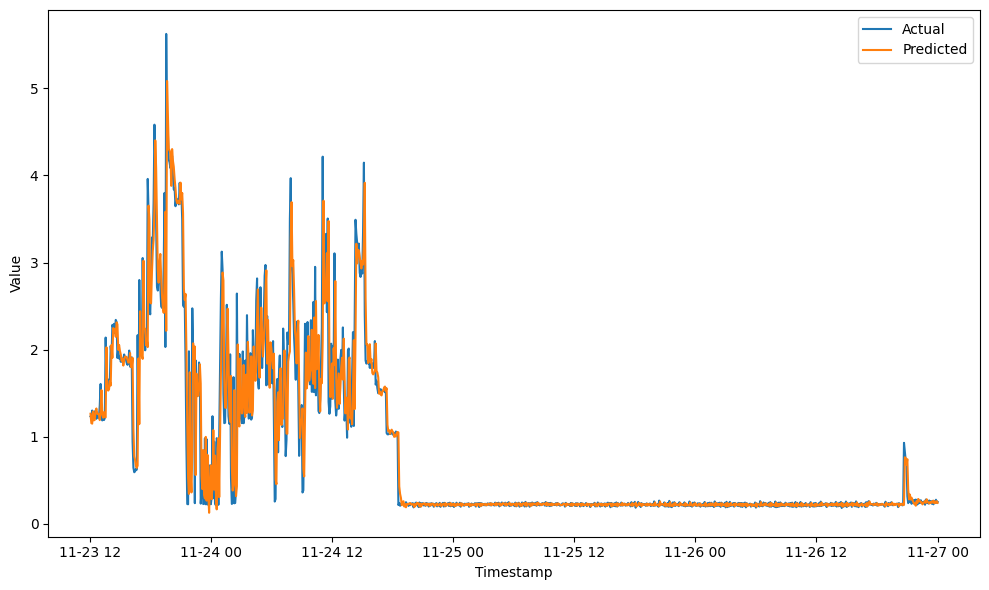

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


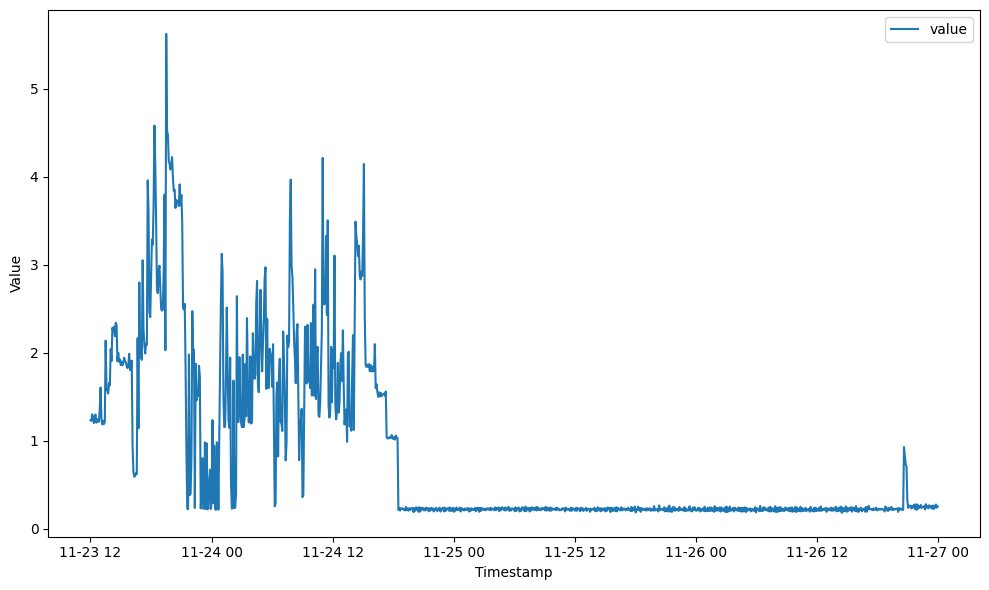

Fold n.2 evaluation result plot:


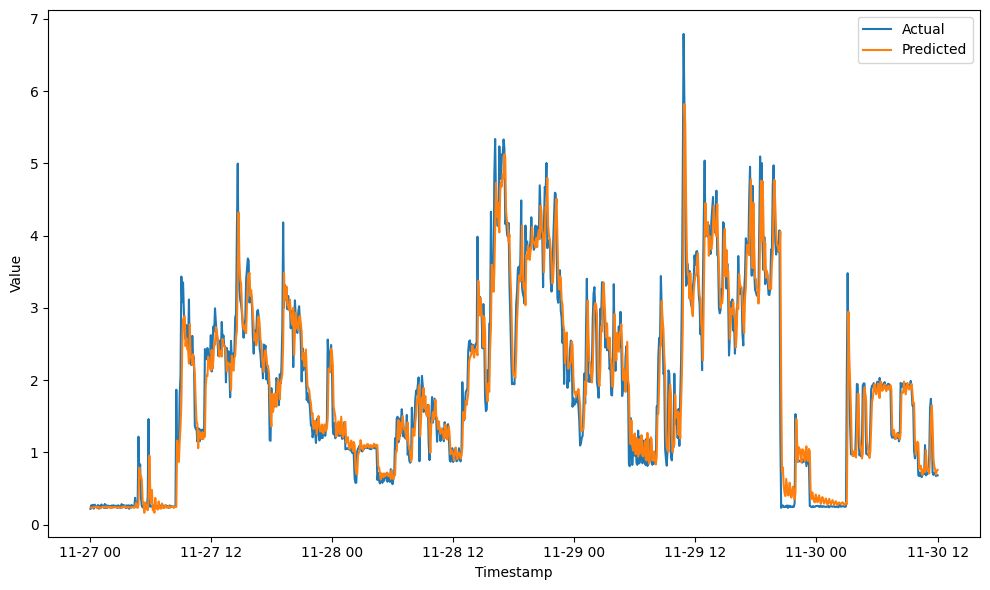

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


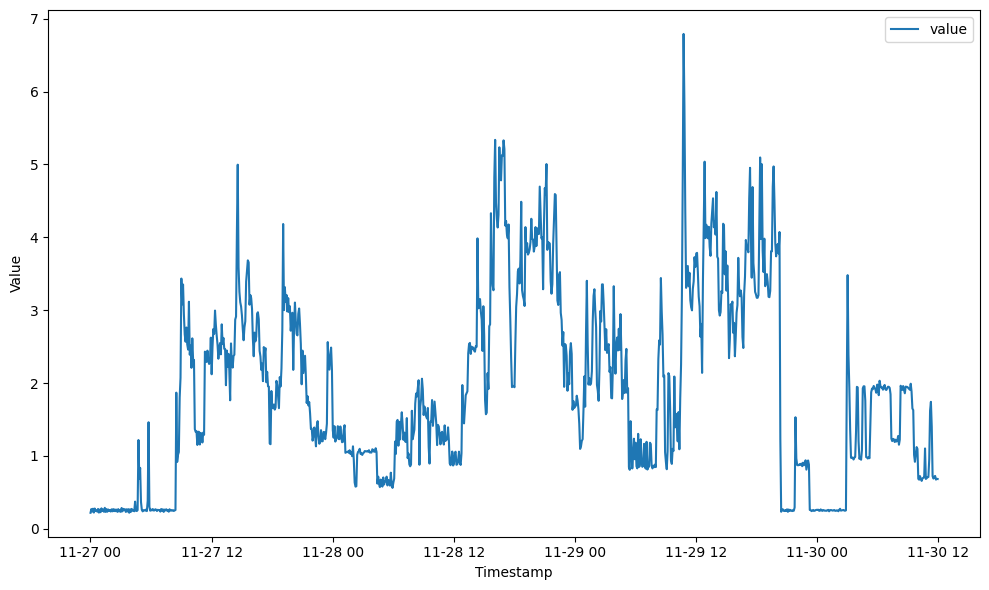

Fold n.3 evaluation result plot:


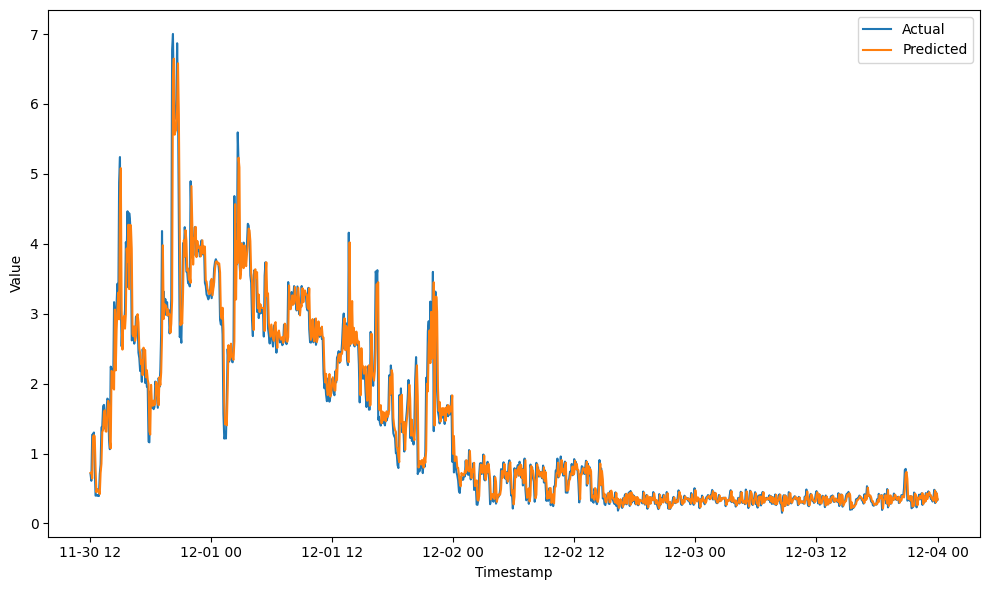

-----------------------------------------



In [13]:
from ts_cross_validation import arima_eval_rolling_ts_cross_validation


arima_rolling_evals_df = arima_eval_rolling_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [14]:
arima_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.378189,0.143027,21.152151,0.169883,0.850710
Fold 2,0.405309,0.164276,17.355578,0.252076,0.897488
Fold 3,0.344325,0.118560,18.201662,0.182369,0.929440
